In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
xlsb_file = '../data/2007-2024-PIT-Counts-by-CoC.xlsb'
all_fay_data = []

with pd.ExcelFile(xlsb_file, engine='pyxlsb') as xlsb:
    for sheet in xlsb.sheet_names:
        df = pd.read_excel(xlsb, sheet_name=sheet, engine='pyxlsb')
        
        if 'CoC Name' not in df.columns:
            continue

        fay_df = df[df['CoC Name'].astype(str).str.contains('Fayetteville/Cum', case=False, na=False)]
        
        if not fay_df.empty:
            # Insert 'Year' column at position 0
            fay_df.insert(0, 'Year', sheet)
            all_fay_data.append(fay_df)

# Combine all sheets into one DataFrame
fay_all_years = pd.concat(all_fay_data, ignore_index=True)

# Preview
fay_all_years.head()


,Year,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Age 25 to 34,...,Unsheltered Homeless Children of Parenting Youth,CoC Number + Name,Unnamed: 3,States,Unnamed: 5,Sheltered Type,Unnamed: 7,HH Type,Unnamed: 9,Subpops
0,2024,NC-511,Fayetteville/Cumberland County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,380.0,51.0,29.0,300.0,77.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,NC-511,Fayetteville/Cumberland County CoC,NaN,Sheltered and Unsheltered Count,474.0,35.0,10.0,NaN,328.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,NC-511,Fayetteville/Cumberland County CoC,NaN,Sheltered and Unsheltered Count,475.0,30.0,1.0,444.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,NC-511,Fayetteville/Cumberland County CoC,NaN,Sheltered-Only Count,54.0,27.0,5.0,22.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,NC-511,Fayetteville/Cumberland County CoC,NaN,Sheltered and Unsheltered Count,297.0,80.0,6.0,211.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
fay_all_years = fay_all_years.iloc[::-1].reset_index(drop=True)


In [9]:
fay_all_years.head()

Year CoC Number                            CoC Name  \
0  CoCs, States, DDs     NC-511  Fayetteville/Cumberland County CoC   
1               2009     NC-511  Fayetteville/Cumberland County CoC   
2               2010     NC-511  Fayetteville/Cumberland County CoC   
3               2011     NC-511  Fayetteville/Cumberland County CoC   
4               2012     NC-511  Fayetteville/Cumberland County CoC   

  CoC Category                      Count Types  Overall Homeless  \
0          NaN                              NaN               NaN   
1          NaN  Sheltered and Unsheltered Count             965.0   
2          NaN  Sheltered and Unsheltered Count            1033.0   
3          NaN  Sheltered and Unsheltered Count            1061.0   
4          NaN  Sheltered and Unsheltered Count            1606.0   

   Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   

   Overall Homeless - Over 24  Overall Homeless - Age 25 to 34  \
0                         NaN                              NaN   
1                         NaN                              NaN   
2                         NaN                              NaN   
3                         NaN                              NaN   
4                         NaN                              NaN   

   Overall Homeless - Age 35 to 44  Overall Homeless - Age 45 to 54  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   

   Overall Homeless - Age 55 to 64  Overall Homeless - Over 64  \
0                              NaN                         NaN   
1                              NaN                         NaN   
2                              NaN                         NaN   
3                              NaN                         NaN   
4                              NaN                         NaN   

   Overall Homeless - Woman  Overall Homeless - Man  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   

   Overall Homeless - Transgender  Overall Homeless - Gender Questioning  \
0                             NaN                                    NaN   
1                             NaN                                    NaN   
2                             NaN                                    NaN   
3                             NaN                                    NaN   
4                             NaN                                    NaN   

   Overall Homeless - Culturally Specific Identity  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Overall Homeless - Different Identity  Overall Homeless - Non Binary  \
0                                    NaN                            NaN   
1                                    NaN                            NaN   
2                                    NaN                            NaN   
3                                    NaN                            NaN   
4                                    NaN                      

In [7]:
pd.set_option('display.max_columns', None)
fay_all_years.head(2)

,Year,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,Overall Homeless - Over 64,Overall Homeless - Woman,Overall Homeless - Man,Overall Homeless - Transgender,Overall Homeless - Gender Questioning,Overall Homeless - Culturally Specific Identity,Overall Homeless - Different Identity,Overall Homeless - Non Binary,Overall Homeless - More Than One Gender,Overall Homeless - Non-Hispanic/Latina/e/o,Overall Homeless - Hispanic/Latina/e/o,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Asian or Asian American,"Overall Homeless - Black, African American, or African",Overall Homeless - Middle Eastern or North African,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - White,Overall Homeless - Multi-Racial,"Overall Homeless - American Indian, Alaska Native, or Indigenous and Hispanic/Latina/e/o","Overall Homeless - American Indian, Alaska Native, or Indigenous Only",Overall Homeless - Asian or Asian American and Hispanic/Latina/e/o,Overall Homeless - Asian or Asian American Only,"Overall Homeless - Black, African American, or African and Hispanic/Latina/e/o","Overall Homeless - Black, African American, or African Only",Overall Homeless - Middle Eastern or North African and Hispanic/Latina/e/o,Overall Homeless - Middle Eastern or North African Only,Overall Homeless - Native Hawaiian or Other Pacific Islander and Hispanic/Latina/e/o,Overall Homeless - Native Hawaiian or Other Pacific Islander Only,Overall Homeless - White and Hispanic/Latina/e/o,Overall Homeless - White Only,Overall Homeless - Multi-Racial and Hispanic/Latina/e/o,Overall Homeless - Multi-Racial Only,Overall Homeless - Hispanic/Latina/e/o Only,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,Sheltered ES Homeless - Age 25 to 34,Sheltered ES Homeless - Age 35 to 44,Sheltered ES Homeless - Age 45 to 54,Sheltered ES Homeless - Age 55 to 64,Sheltered ES Homeless - Over 64,Sheltered ES Homeless - Woman,Sheltered ES Homeless - Man,Sheltered ES Homeless - Transgender,Sheltered ES Homeless - Gender Questioning,Sheltered ES Homeless - Culturally Specific Identity,Sheltered ES Homeless - Different Identity,Sheltered ES Homeless - Non Binary,Sheltered ES Homeless - More Than One Gender,Sheltered ES Homeless - Non-Hispanic/Latina/e/o,Sheltered ES Homeless - Hispanic/Latina/e/o,"Sheltered ES Homeless - American Indian, Alaska Native, or Indigenous",Sheltered ES Homeless - Asian or Asian American,"Sheltered ES Homeless - Black, African American, or African",Sheltered ES Homeless - Middle Eastern or North African,Sheltered ES Homeless - Native Hawaiian or Other Pacific Islander,Sheltered ES Homeless - White,Sheltered ES Homeless - Multi-Racial,"Sheltered ES Homeless - American Indian, Alaska Native, or Indigenous and Hispanic/Latina/e/o","Sheltered ES Homeless - American Indian, Alaska Native, or Indigenous Only",Sheltered ES Homeless - Asian or Asian American and Hispanic/Latina/e/o,Sheltered ES Homeless - Asian or Asian American Only,"Sheltered ES Homeless - Black, African American, or African and Hispanic/Latina/e/o","Sheltered ES Homeless - Black, African American, or African Only",Sheltered ES Homeless - Middle Eastern or North African and Hispanic/Latina/e/o,Sheltered ES Homeless - Middle Eastern or North African Only,Sheltered ES Homeless - Native Hawaiian or Other Pacific Islander and Hispanic/Latina/e/o,Sheltered ES Homeless - Native Hawaiian or Other Pacific Islander Only,Sheltered ES Homeless - White and Hispanic/Latina/e/o,Sheltered ES Homeless - White Only,Sheltered ES Homeless - Multi-Racial and Hispanic/Latina/e/o,Sheltered ES Homeless - Multi-Racial Only,Sheltered ES Homeless - Hispanic/Latina/e/o Only,Shelte

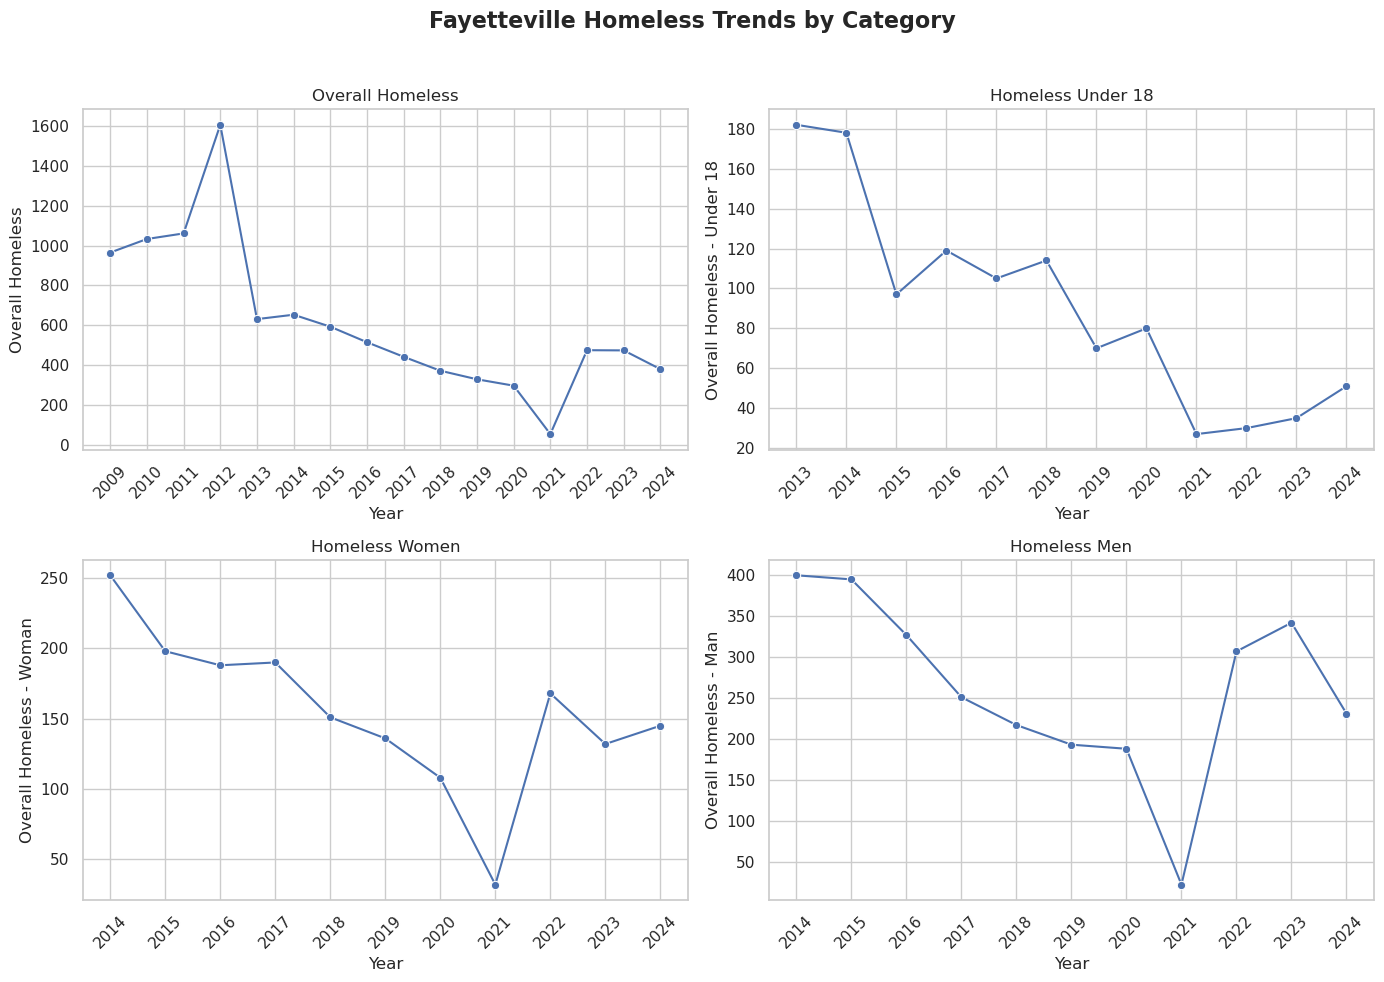

In [7]:
# Ensure 'Year' is treated as a string or category for correct plotting order
fay_all_years['Year'] = fay_all_years['Year'].astype(str)
fay_all_years = fay_all_years.sort_values('Year')

# Set the overall style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Fayetteville Homeless Trends by Category', fontsize=16, weight='bold')

# Plot 1: Overall Homeless
sns.lineplot(data=fay_all_years, x='Year', y='Overall Homeless', ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Overall Homeless')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Under 18
sns.lineplot(data=fay_all_years, x='Year', y='Overall Homeless - Under 18', ax=axs[0, 1], marker='o')
axs[0, 1].set_title('Homeless Under 18')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Women
sns.lineplot(data=fay_all_years, x='Year', y='Overall Homeless - Woman', ax=axs[1, 0], marker='o')
axs[1, 0].set_title('Homeless Women')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Men
sns.lineplot(data=fay_all_years, x='Year', y='Overall Homeless - Man', ax=axs[1, 1], marker='o')
axs[1, 1].set_title('Homeless Men')
axs[1, 1].tick_params(axis='x', rotation=45)

# Tight layout for aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()
